#### Mini Project 5

# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
df = pd.read_csv('employee_data.csv')
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

### Descriptive Statistics

In [4]:
nums = df.select_dtypes(include=['int64', 'float64']).columns
cats = df.select_dtypes(include=['object']).columns

In [5]:
df[nums].describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


In [6]:
df[cats].describe()

,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287,287,287,287,287,287,287,287,287,287,287,287,221,287,287,287,287
unique,285,5,2,3,14,3,5,5,9,287,287,3,2,11,284,97,127,53
top,boredEggs0,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,1,masih_bekerja,1987-06-14,2011-01-10,2020-1-14,-
freq,2,132,167,217,109,169,85,72,85,1,1,176,286,132,2,12,17,198


# **Data Pre-processing**

### Missing Value
---

In [7]:
df1 = df.copy()

In [8]:
df1.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [9]:
# Numerikal
df1['SkorKepuasanPegawai'].fillna(df1['SkorKepuasanPegawai'].mean(), inplace=True)
df1['JumlahKeikutsertaanProjek'].fillna(df1['JumlahKeikutsertaanProjek'].mean(), inplace=True)
df1['JumlahKeterlambatanSebulanTerakhir'].fillna(df1['JumlahKeterlambatanSebulanTerakhir'].mean(), inplace=True)
df1['JumlahKetidakhadiran'].fillna(df1['JumlahKetidakhadiran'].mean(), inplace=True)
df1['IkutProgramLOP'].fillna(df1['IkutProgramLOP'].mean(), inplace=True)

#Kategorikal
df1['AlasanResign'].fillna(df1['AlasanResign'].mode()[0], inplace=True)

In [10]:
df1.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
IkutProgramLOP                        0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0


### Duplicated Values
---

In [11]:
df1.duplicated().sum()

0

### Replacing Values
---

In [12]:
df1['PernahBekerja'].value_counts()

PernahBekerja
1      286
yes      1
Name: count, dtype: int64

Karena setelah dilihat values dari kolom 'PernahBekerja' adalah 1 dan 'yes' yang memiliki arti sama, maka dari itu data akan diubah menjadi 1 semua dan diubah menjadi tipe data numerikal.

In [13]:
df1['PernahBekerja'] = df1['PernahBekerja'].replace({'yes': 1, '1': 1})
df1['PernahBekerja'] = pd.to_numeric(df1['PernahBekerja'], errors='coerce')

In [14]:
df1['PernahBekerja'].value_counts()

PernahBekerja
1    287
Name: count, dtype: int64

### Feature Engineering
---

Karena target yang diperlukan adalah mengenai karyawan yang resign atau tidak, maka data akan diambil dari kolom 'TanggalResign'. Diasumsikan bahwa pada kolom 'TanggalResign' yang berisi '-' adalah data karyawan yang tidak resign, dan sisanya merupakan data karyawan yang resign, maka akan dikelompokkan seperti demikian.

In [15]:
df1['Resign'] = np.where(df1['TanggalResign'] == '-', 0,
                1)

In [16]:
df1['Resign'].value_counts()

Resign
0    198
1     89
Name: count, dtype: int64

### Handling Outliers
---

In [17]:
df2 = df1.copy()

In [18]:
nums1 = df2.select_dtypes(include=['int64', 'float64', 'int32']).columns
cats1 = df2.select_dtypes(include=['object']).columns

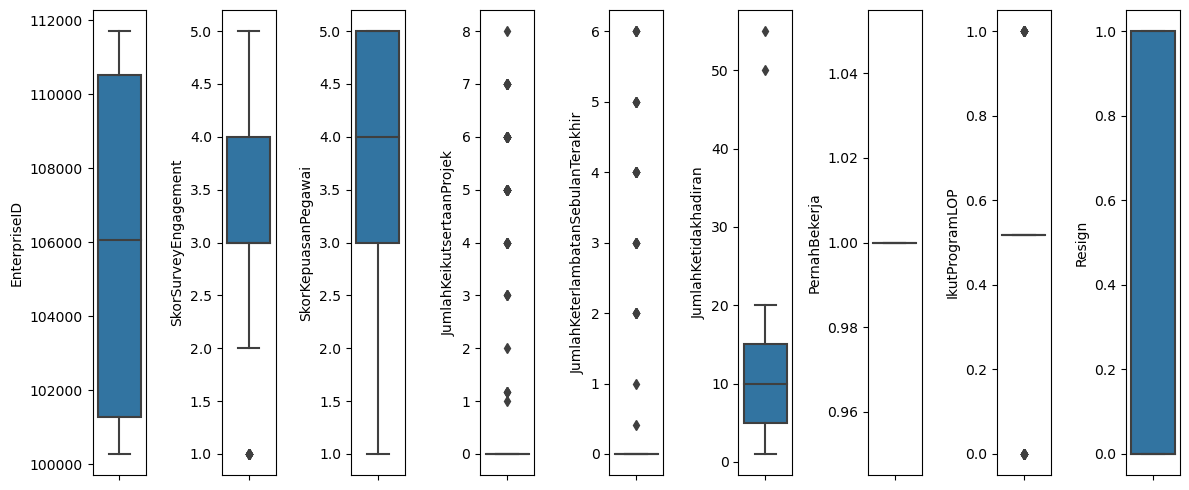

In [19]:
plt.figure(figsize=(12, 5))

for i, col in enumerate(nums1):
    plt.subplot(1, len(nums1), i + 1)
    sns.boxplot(y=df2[col], orient='v')
    plt.tight_layout()

plt.show()

In [20]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df2)}')

df_out = ['SkorSurveyEngagement','JumlahKetidakhadiran']

filtered_entries = np.array([True] * len(df2))

for col in df_out:
    zscore = abs(stats.zscore(df2[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df2 = df2[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 287
Jumlah baris setelah memfilter outlier: 285


### Feature Selection
---

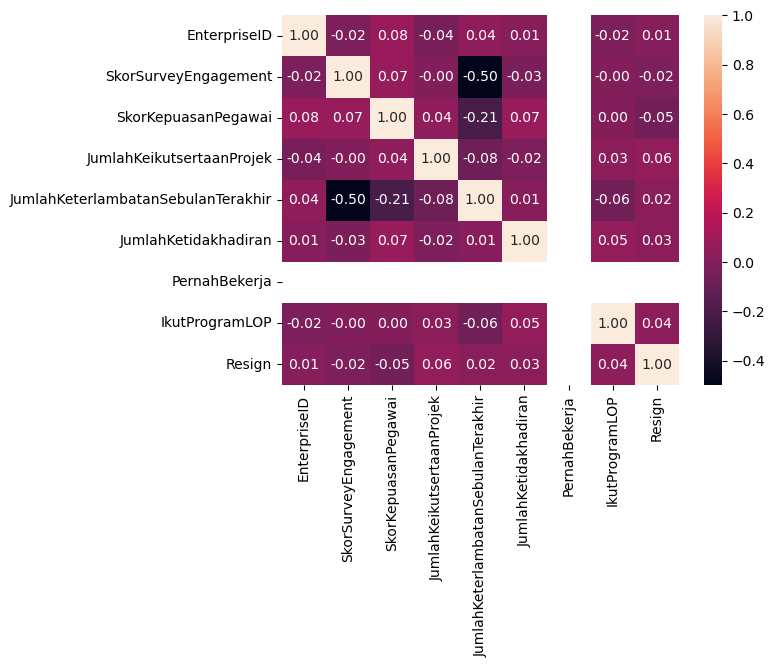

In [21]:
corr = df2[nums1].corr()
sns.heatmap(df2[nums1].corr(), annot=True, fmt= '.2f')
plt.show()

In [91]:
df3 = df2.drop(columns=['PernahBekerja','IkutProgramLOP','EnterpriseID','Username','NomorHP','Email','TanggalLahir'])

In [92]:
df3.head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resign
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,masih_bekerja,2011-01-10,2016-2-15,-,0
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,toxic_culture,2014-01-06,2020-1-17,2018-6-16,1
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,jam_kerja,2011-01-10,2016-01-10,2014-9-24,1
3,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,masih_bekerja,2014-2-17,2020-02-04,-,0
4,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,ganti_karir,2013-11-11,2020-1-22,2018-09-06,1


Kolom yang dihapus:
- Kolom 'PernahBekerja' dihapus karena memiliki satu unique value, dan juga kolom 'IkutProgramLOP' karena memiliki nilai yang hampir sama semua setelah dilakukan replace value karena terlalu banyak missing value.
- Kolom 'EnterpriseID', 'Username', 'NomorHP', 'Email', 'TanggalLahir' dihapus karena merupakan unique values.

---
# **Annual Report On Employee Number Changes**

#### 1. Tabel Agregat

In [93]:
# Convert data tanggal untuk diambil tahun
df3['TahunHiring'] = pd.to_datetime(df3['TanggalHiring']).dt.year
df3['TahunResign'] = pd.to_datetime(df3['TanggalResign'], errors='coerce').dt.year

In [94]:
df3.head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,...,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resign,TahunHiring,TahunResign
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,...,0.0,9.0,Magister,masih_bekerja,2011-01-10,2016-2-15,-,0,2011,NaN
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,...,0.0,3.0,Sarjana,toxic_culture,2014-01-06,2020-1-17,2018-6-16,1,2014,2018.0
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,...,0.0,11.0,Magister,jam_kerja,2011-01-10,2016-01-10,2014-9-24,1,2011,2014.0
3,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,...,4.0,6.0,Sarjana,masih_bekerja,2014-2-17,2020-02-04,-,0,2014,NaN
4,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,...,0.0,11.0,Sarjana,ganti_karir,2013-11-11,2020-1-22,2018-09-06,1,2013,2018.0


In [95]:
# Tabel baru
TotalHired = df3.groupby('TahunHiring').size().reset_index(name='HiredEmp')
TotalResigned = df3.groupby('TahunResign').size().reset_index(name='ResignedEmp')

#### 2. Join Tabel

In [96]:
# Rename nama kolom untuk tahun
TotalHired.rename(columns={'TahunHiring': 'Tahun'}, inplace=True)
TotalResigned.rename(columns={'TahunResign': 'Tahun'}, inplace=True)

# Join 2 tabel data jumlah karyawan
TotalEmp = pd.merge(TotalHired, TotalResigned, on='Tahun', how='outer')

In [97]:
TotalEmp

,Tahun,HiredEmp,ResignedEmp
0,2006.0,1.0,NaN
1,2007.0,2.0,NaN
2,2008.0,2.0,NaN
3,2009.0,7.0,NaN
4,2010.0,8.0,NaN
5,2011.0,75.0,NaN
6,2012.0,41.0,NaN
7,2013.0,42.0,5.0
8,2014.0,56.0,12.0
9,2015.0,31.0,8.0


#### 3. Imputation Data

In [98]:
# Imputation data
TotalEmp = TotalEmp.sort_values(by='Tahun').reset_index(drop=True)
TotalEmp['HiredEmp'].fillna(0, inplace=True)
TotalEmp['ResignedEmp'].fillna(0, inplace=True)

In [99]:
TotalEmp

,Tahun,HiredEmp,ResignedEmp
0,2006.0,1.0,0.0
1,2007.0,2.0,0.0
2,2008.0,2.0,0.0
3,2009.0,7.0,0.0
4,2010.0,8.0,0.0
5,2011.0,75.0,0.0
6,2012.0,41.0,0.0
7,2013.0,42.0,5.0
8,2014.0,56.0,12.0
9,2015.0,31.0,8.0


#### 4. Hitung Total Perubahan Karyawan

In [100]:
# Karyawan yang resign, yang masih bertahan (remained), dan perubahannya pada setiap tahunnya
TotalEmp['RemainedEmp'] = TotalEmp['HiredEmp'].cumsum() - TotalEmp['ResignedEmp'].cumsum()
TotalEmp['Perubahan'] = TotalEmp['HiredEmp'] - TotalEmp['ResignedEmp']

In [101]:
TotalEmp

,Tahun,HiredEmp,ResignedEmp,RemainedEmp,Perubahan
0,2006.0,1.0,0.0,1.0,1.0
1,2007.0,2.0,0.0,3.0,2.0
2,2008.0,2.0,0.0,5.0,2.0
3,2009.0,7.0,0.0,12.0,7.0
4,2010.0,8.0,0.0,20.0,8.0
5,2011.0,75.0,0.0,95.0,75.0
6,2012.0,41.0,0.0,136.0,41.0
7,2013.0,42.0,5.0,173.0,37.0
8,2014.0,56.0,12.0,217.0,44.0
9,2015.0,31.0,8.0,240.0,23.0


#### 5. Plot

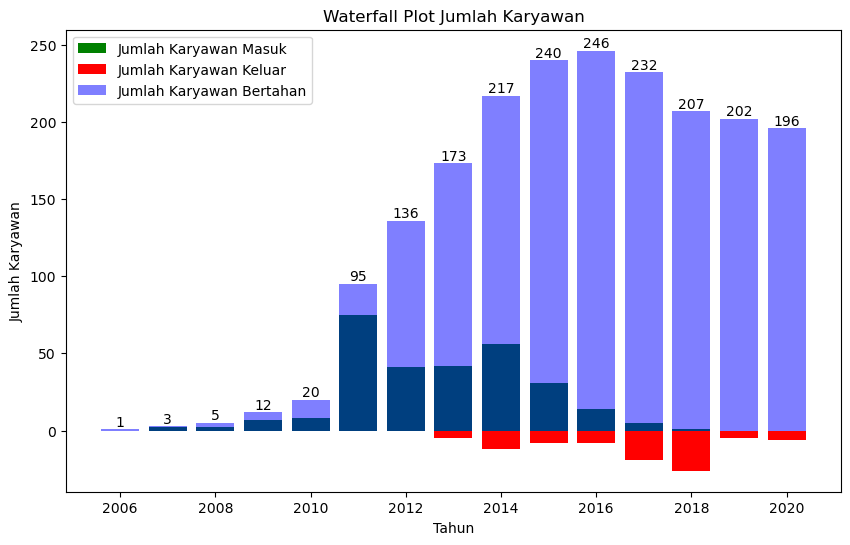

In [105]:
years = TotalEmp['Tahun']
hired = TotalEmp['HiredEmp']
resigned = TotalEmp['ResignedEmp']
remained = TotalEmp['RemainedEmp']
perubahan = TotalEmp['Perubahan']

plt.figure(figsize=(10, 6))

cumulative_values = np.zeros(len(years))
cumulative_values[0] = remained.iloc[0]  # Initial value

increment = []
decrement = []
for i in range(1, len(years)):
    increment.append(hired.iloc[i])
    decrement.append(-resigned.iloc[i])
    cumulative_values[i] = cumulative_values[i-1] + perubahan.iloc[i]

plt.bar(years[1:], increment, color='g', label='Jumlah Karyawan Masuk')
plt.bar(years[1:], decrement, color='r', label='Jumlah Karyawan Keluar')
plt.bar(years, cumulative_values, color='b', label='Jumlah Karyawan Bertahan', alpha=0.5)

plt.xlabel('Tahun')
plt.ylabel('Jumlah Karyawan')
plt.title('Waterfall Plot Jumlah Karyawan')
plt.legend()

for i in range(len(years)):
    plt.text(years.iloc[i], cumulative_values[i], f'{cumulative_values[i]:.0f}', ha='center', va='bottom')

plt.show()

#### 6. Interpretasi <br>

Interpretasi dari plot di atas adalah:
- Pada tahun 2011 & 2012, jumlah karyawan yang dipekerjakan naik secara drastis. Hal ini bisa menunjukkan bahwa kondisi perusahaan sedang sehat, sehingga mampu untuk mempekerjakan karyawan dalam jumlah banyak.
- Pada tahun 2013 - 2015, jumlah karyawan memiliki peningkatan secara stabil, yang bisa menunjukkan kondisi perusahaan yang sedang stabil.
- Dari tahun 2016, perusahaan mengalami penurunan jumlah karyawan, yang berlanjut terus hingga tahun 2020. Hal ini kemungkinan menunjukkan kondisi perusahaan yang sedang kurang sehat sehingga jumlah karyawan yang mengundurkan diri terus bertambah.

# **Resign Reason Analysis For Employee Attrition Management Strategy**

#### 1. Tabel Agregat

In [147]:
# Membuat 2 tabel berisi data karyawan yang resign dan tidak
resign = df3[df3['TanggalResign'].notnull()]
not_resign = df3[df3['TanggalResign'] == '-']

In [148]:
# Agregasi berdasarkan pekerjaan
agg_resign = resign.groupby('Pekerjaan').size().reset_index(name='TotalResign')
agg_not_resign = not_resign.groupby('Pekerjaan').size().reset_index(name='TotalNotResign')

#### 2. Join Tabel

In [149]:
# Join 2 tabel
resign2 = pd.merge(agg_resign, agg_not_resign, on='Pekerjaan', how='outer')

In [150]:
resign2

,Pekerjaan,TotalResign,TotalNotResign
0,Data Analyst,16,8
1,Data Engineer,10,7
2,DevOps Engineer,3,3
3,Digital Product Manager,2,2
4,Machine Learning Engineer,2,2
5,Product Design (UI & UX),24,15
6,Product Design (UX Researcher),1,1
7,Product Manager,17,11
8,Scrum Master,3,3
9,Software Architect,1,1


#### 3. Kolom Baru

In [151]:
# Membuat kolom total jumlah karyawan & presentase karyawan yang bertahan
resign2.fillna(0, inplace=True)
resign2['TotalKaryawan'] = resign2['TotalResign'] + resign2['TotalNotResign']

resign2['PersentaseNotResign'] = resign2['TotalNotResign'] / resign2['TotalKaryawan'] * 100
resign2['PersentaseNotResign'] = resign2['PersentaseNotResign'].round(2)

In [152]:
resign2

,Pekerjaan,TotalResign,TotalNotResign,TotalKaryawan,PersentaseNotResign
0,Data Analyst,16,8,24,33.33
1,Data Engineer,10,7,17,41.18
2,DevOps Engineer,3,3,6,50.00
3,Digital Product Manager,2,2,4,50.00
4,Machine Learning Engineer,2,2,4,50.00
5,Product Design (UI & UX),24,15,39,38.46
6,Product Design (UX Researcher),1,1,2,50.00
7,Product Manager,17,11,28,39.29
8,Scrum Master,3,3,6,50.00
9,Software Architect,1,1,2,50.00


Divisi pekerjaan dengan jumlah total karyawan yang resign adalah Divisi **Software Engineer (Back End).**

#### 4. Plot

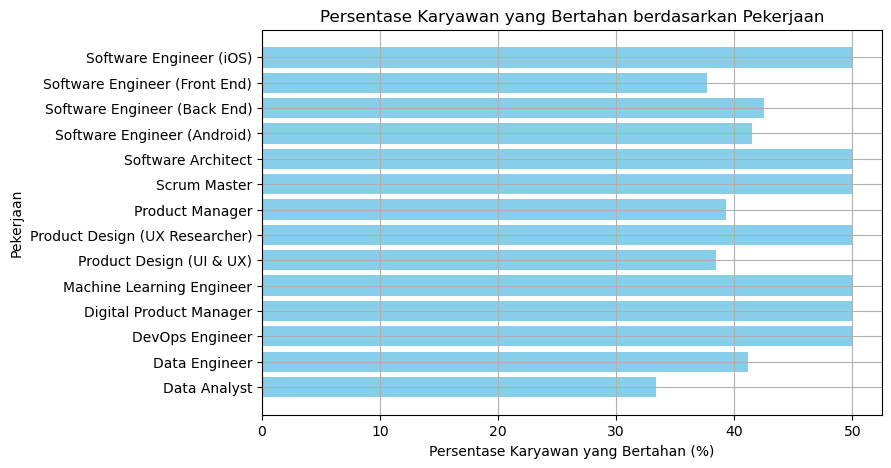

In [129]:
plt.figure(figsize=(8, 5))
plt.barh(resign2['Pekerjaan'], resign2['PersentaseNotResign'], color='skyblue')
plt.xlabel('Persentase Karyawan yang Bertahan (%)')
plt.ylabel('Pekerjaan')
plt.title('Persentase Karyawan yang Bertahan berdasarkan Pekerjaan')
plt.grid(True)
plt.show()

Kesimpulan:
- Divisi pekerjaan Data Analyst memiliki presentase karyawan bertahan yang paling rendah, hal ini menunjukkan kemungkinan bahwa divisi Data Analyst memiliki tingkat karyawan resign yang tertinggi.
- Divisi pekerjaan Software Engineer (ios), Software Architect, Scrum Master, Product Design (UX Researcher), Machine Learning Engineer, Digital roduct Manager, dan DevOps Engineer memiliki presentase karyawan bertahan yang paling tinggi, menunjukkan kemungkinan stabilitas pada divisi pekerjaan tersebut.

#### 5. Tabel Agregasi (Divisi dengan Resign Tertinggi)

**Tingkat resign tertinggi berdasarkan persentase karyawan bertahan terendah**

In [155]:
# Menemukan divisi dengan tingkat resign tertinggi
resign_max = resign2.loc[resign2['PersentaseNotResign'].idxmin(), 'Pekerjaan']

# Menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign
detail_resign = resign[resign['Pekerjaan'] == resign_max]\
    .groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='JumlahResign')

In [156]:
resign_max

'Data Analyst'

Berdasarkan **persentase karyawan bertahan yang terendah**, divisi pekerjaan dengan tingkat karyawan resign yang tertingi adalah divisi **Data Analyst.**

In [157]:
detail_resign

,JenjangKarir,PerformancePegawai,AlasanResign,JumlahResign
0,Freshgraduate_program,Bagus,masih_bekerja,1
1,Freshgraduate_program,Bagus,toxic_culture,1
2,Freshgraduate_program,Biasa,internal_conflict,1
3,Freshgraduate_program,Biasa,masih_bekerja,1
4,Freshgraduate_program,Biasa,toxic_culture,1
5,Freshgraduate_program,Sangat_bagus,internal_conflict,1
6,Freshgraduate_program,Sangat_bagus,toxic_culture,3
7,Freshgraduate_program,Sangat_kurang,toxic_culture,1
8,Mid_level,Bagus,masih_bekerja,1
9,Mid_level,Kurang,masih_bekerja,1


**Tingkat resign tertinggi berdasarkan jumlah karyawan yang resign**

In [159]:
# Menemukan divisi dengan tingkat resign tertinggi
resign_max2 = resign2.loc[resign2['TotalResign'].idxmax(), 'Pekerjaan']

# Menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign
detail_resign2 = resign[resign['Pekerjaan'] == resign_max2]\
    .groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='JumlahResign')

In [160]:
resign_max2

'Software Engineer (Back End)'

Jika berdasarkan **jumlah karyawan yang resign**, divisi pekerjaan yang memiliki tingkat karyawan resign yang tertinggi adalah divisi **Software Engineer (Back End).**

In [161]:
detail_resign2

,JenjangKarir,PerformancePegawai,AlasanResign,JumlahResign
0,Freshgraduate_program,Bagus,kejelasan_karir,1
1,Freshgraduate_program,Bagus,masih_bekerja,11
2,Freshgraduate_program,Bagus,toxic_culture,1
3,Freshgraduate_program,Biasa,ganti_karir,2
4,Freshgraduate_program,Biasa,jam_kerja,1
5,Freshgraduate_program,Biasa,kejelasan_karir,1
6,Freshgraduate_program,Biasa,leadership,1
7,Freshgraduate_program,Biasa,masih_bekerja,18
8,Freshgraduate_program,Biasa,tidak_bisa_remote,1
9,Freshgraduate_program,Kurang,ganti_karir,1


#### 6. Plot (Divisi dengan Tingkat Resign Tertinggi berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign

##### **Divisi Data Analyst** (berdasarkan tingkat karyawan bertahan terendah)

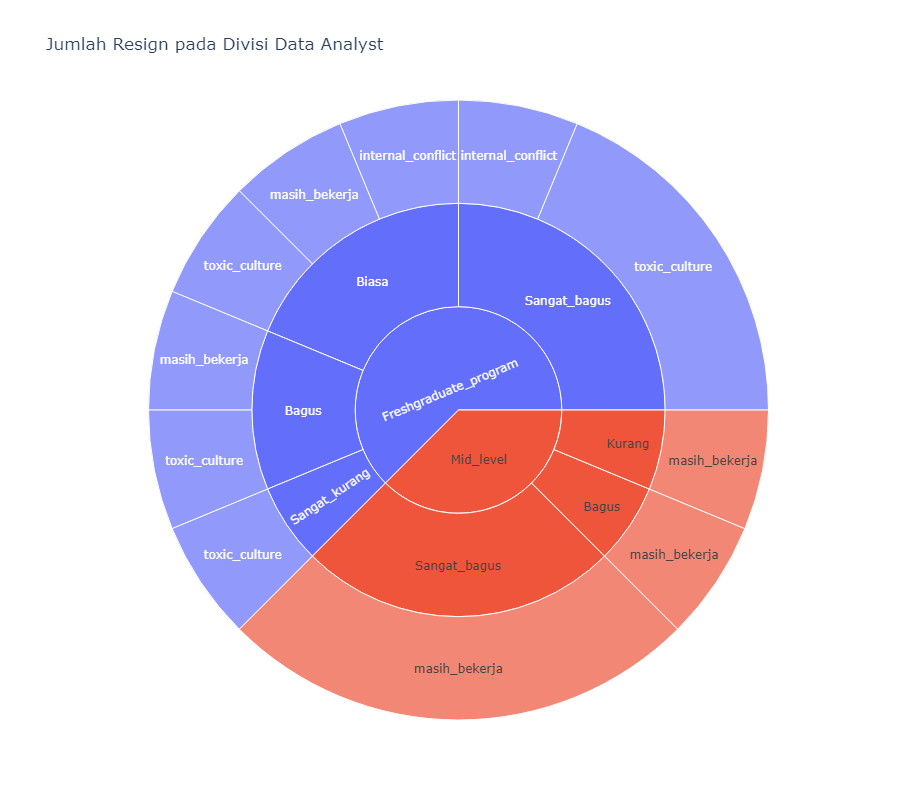

In [165]:
fig = px.sunburst(detail_resign,
                  path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'],
                  values='JumlahResign',
                  title='Jumlah Resign pada Divisi Data Analyst')

fig.update_layout(
    width=800,
    height=800
)

fig.show()

**Kesimpulan:**
- Berdasarkan plot tersebut, paling banyak karyawan dari Freshgraduate Program yang resign karena adanya toxic culture pada divisi Data Analyst, dan kebanyakan adalah karyawan dengan performance yang sangat bagus.
- Bagi karyawan Mid Level, paling banyak resign karena alasan masih bekerja.<br>

**Rekomendasi:**
- Perlu adanya pelatihan untuk manajer dan tim mengenai kepemimpinan yang baik, komunikasi efektif, dan pengelolaan konflik.
- Adakan program mentorship di mana karyawan baru, terutama freshgraduate, dapat memperoleh dukungan dan bimbingan dari karyawan yang lebih berpengalaman, untuk membantu proses adaptasi di perusahaan.
- Bagi karyawan Mid Level, lakukan peninjauan proses kerja yang bisa mengurangi beban kerja.

##### **Divisi Software Engineer (Back End)** (berdasarkan jumlah total karyawan resign tertinggi)

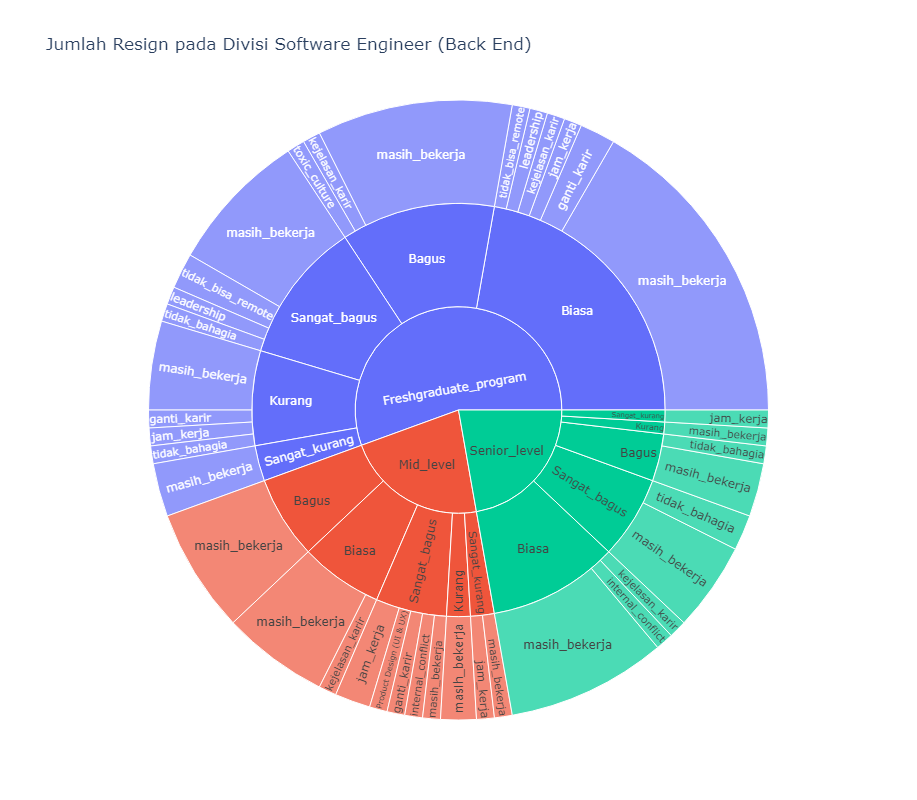

In [166]:
fig = px.sunburst(detail_resign2,
                  path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'],
                  values='JumlahResign',
                  title='Jumlah Resign pada Divisi Software Engineer (Back End)')

fig.update_layout(
    width=800,
    height=800
)

fig.show()

**Kesimpulan:**
- Dari divisi Software Engineer (Back End), paling banyak karyawan dari Freshgraduate Program resign dengan alasan masih bekerja.
- Sama dengan karyawan Mid Level dan Senior Level juga paling banyak resign karena masih bekerja. <br>

**Rekomendasi:**
- Lakukan peninjauan beban kerja dan pastikan bahwa karyawan tidak terbebani secara berlebihan. Jika diperlukan, pertimbangkan untuk menambah sumber daya atau membagi pekerjaan dengan lebih merata.
- Menawarkan fleksibilitas kerja seperti jam kerja yang fleksibel atau pilihan untuk WFH, agar karyawan bisa menyeimbangkan pekerjaan dan kehidupan pribadi.